# Прогноз продаж компьюерных игр на 2017 год

## Описание задачи

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Даны данные до 2016 года. Нужно спланировать кампанию на 2017-й.

## План работ

#### Шаг 1. Откройте файл с данными и изучите общую информацию
 
#### Шаг 2. Подготовьте данные

#### Шаг 3. Проведите исследовательский анализ данных


#### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

   - Самые популярные платформы (топ-5).
   - Самые популярные жанры (топ-5).

#### Шаг 5. Проверьте гипотезы

   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

#### Шаг 6. Напишите общий вывод

## Описание данных

Таблица `games_data` (информация о дате релиза, сборах, оценках и рейтинге игр).

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_data['Platform'].value_counts(dropna=False)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [6]:
games_data['Year_of_Release'].value_counts(dropna=False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [7]:
games_data['Genre'].value_counts(dropna=False)

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
NaN                2
Name: Genre, dtype: int64

In [8]:
games_data['Critic_Score'].value_counts(dropna=False).head(10)

NaN     8578
70.0     256
71.0     254
75.0     245
78.0     240
73.0     238
80.0     237
76.0     235
74.0     226
72.0     226
Name: Critic_Score, dtype: int64

In [9]:
games_data['User_Score'].value_counts(dropna=False).head(10)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
Name: User_Score, dtype: int64

In [10]:
games_data['Rating'].value_counts(dropna=False)

NaN     6766
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [11]:
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод

Данные изучены. Основные проблемы на поверхности:

 - в названии столбцов присутствуют большие буквы;
 - много пропусков;
 - не соблюдены типы данных.

## Шаг 2. Подготовьте данные

Заменим названия столбцов.

In [12]:
games_data.columns = games_data.columns.str.lower()

In [13]:
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Обработаем пропуски и параллельно преобразуем данные в нужные типы.

 - year_of_release - float, преобразуем в int32 чтобы избавиться от .0;
 - user_score - object, преобразуем в float;
 - critic_score - преобразуем в Int32.

In [14]:
games_data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски в name и genre малочисленны. Также без имени и жанра нельзя точно исследовать данные. Поэтому мы удалим эти строки.

In [15]:
games_data = games_data[games_data['name'].notna()]

Заполним пропуски в rating. Вместо NaN вставим 'no_rating'.

In [16]:
games_data['rating'] = games_data['rating'].fillna('no_rating')
games_data['rating'].value_counts()

no_rating    6764
E            3990
T            2961
M            1563
E10+         1420
EC              8
RP              3
K-A             3
AO              1
Name: rating, dtype: int64

Удалим строки, там где отсутствует год. Просто заполнить средним или "абы каким" значением нельзя, а искать год для каждой игры и дня не хватит.

In [17]:
games_data = games_data[games_data['year_of_release'].notna()]

In [18]:
games_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Пропуски в critic_score и user_score я решил оставить. Они являются большой частью данных, и, удалив их, может исказиться резульлтат. Можно сказать только то, что этих игр нет на метакритике.

In [19]:
games_data['year_of_release'] = games_data['year_of_release'].astype('int32')

tbd - to be discussed. Это означавет, что отзывов по этой игре еще не достаточно для выставления оценки. В нашем случае это эквивалентно NaN.

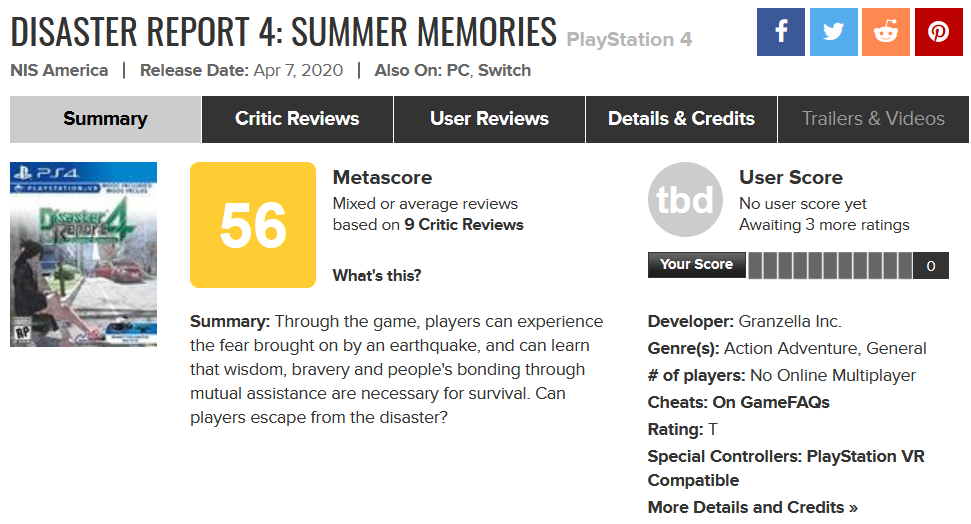

user_score - object, преобразуем в float. Для этого заменим tbd на NaN.

In [20]:
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = np.nan

И заменим на более подходящий тип данных.

In [21]:
games_data['user_score'] = pd.to_numeric(games_data['user_score'])

critic_score - преобразуем в Int32.

In [22]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int32
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Расчитаем суммарные продажи.

In [23]:
games_data['total_sales'] = (games_data['na_sales'] 
                             + games_data['eu_sales'] 
                             + games_data['jp_sales'] 
                             + games_data['other_sales'])

In [24]:
games_data = games_data.reset_index(drop=True)
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


### Вывод

Данные приведены к нормальному виду. Пропуски остались только в столбцах с рейтингом, но что-либо сделать с ними мы не можем.

## Шаг 3. Проведите исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Для этого воспользуемся графиками.

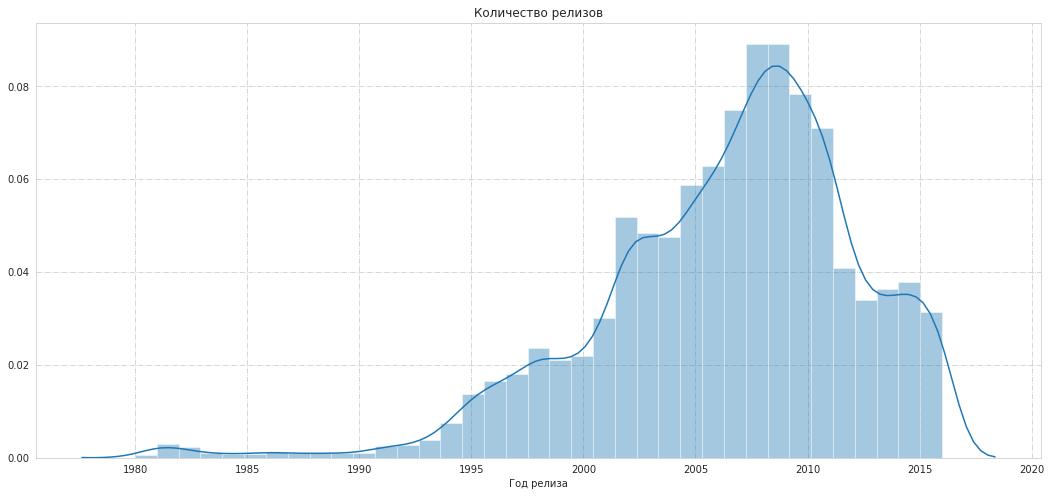

In [25]:
with sns.axes_style('whitegrid', {'grid.linestyle':'-.'}):
    fig, ax = plt.subplots(figsize=(18,8))
    sns.distplot(games_data['year_of_release'], bins=37, ax=ax);
    ax.set_title('Количество релизов')
    plt.xlabel('Год релиза')
print()

In [26]:
sns.set_style('darkgrid', {'grid.linestyle':'--'})

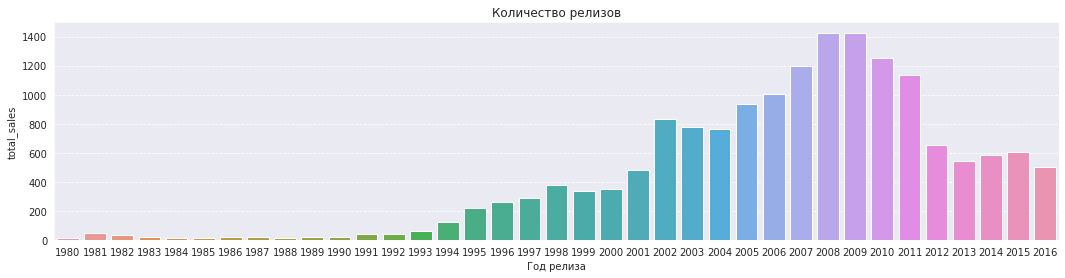

In [27]:
fig, ax = plt.subplots(figsize=(18,4))
sns.barplot(x='year_of_release', y='total_sales',data=games_data, ax=ax, estimator=len)
ax.set_title('Количество релизов')
plt.xlabel('Год релиза')
print()

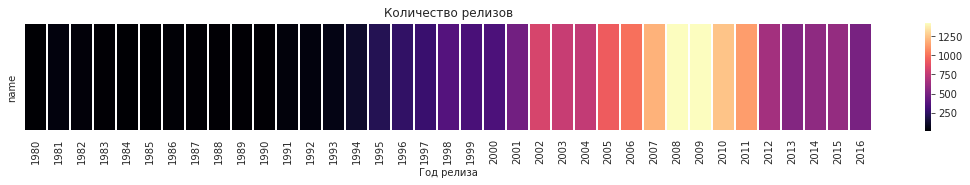

In [28]:
fig, ax = plt.subplots(figsize=(19,2))
sns.heatmap(games_data.pivot_table(values='name', columns='year_of_release', aggfunc='count'),cmap='magma',linecolor='white', linewidths=1, ax=ax)
plt.xlabel('Год релиза')
ax.set_title('Количество релизов')
print()

До 1994 года количество игр в год было очень малым, и практически не изменялось. Но 1995 года рынок стал стремительно развиваться и к 2008 году достиг своего пика. Однако количество релизов с 2010 года пошло на спад.

Я считаю, что еще нужно исследовать заисимость продаж от года. Это покажет нам период, когда продажи значительно выросли и поможет определиться с тем периодом, когда рынок игр изменился.

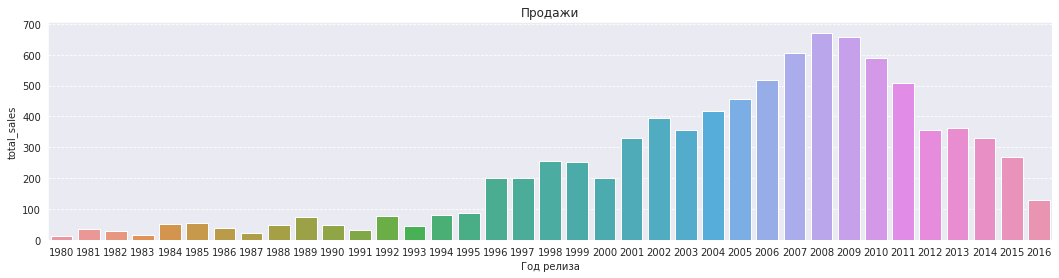

In [29]:
fig, ax = plt.subplots(figsize=(18,4))
sns.barplot(x='year_of_release', y='total_sales',data=games_data, ax=ax, estimator=sum, ci=None)
ax.set_title('Продажи')
plt.xlabel('Год релиза')
print()

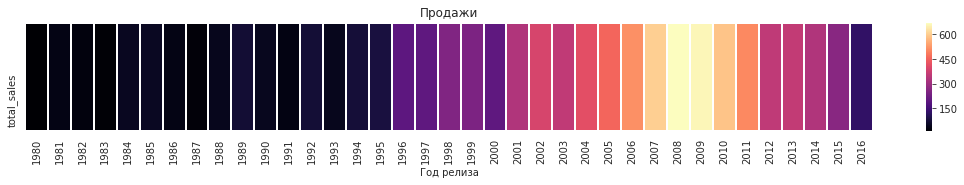

In [30]:
fig, ax = plt.subplots(figsize=(19,2))
sns.heatmap(games_data.pivot_table(columns='year_of_release',values='total_sales', aggfunc='sum'), cmap='magma',linecolor='white',linewidths=1, ax=ax)
ax.set_title('Продажи')
plt.xlabel('Год релиза')
print()

В сборах прослеживается примерно та же динамика как и в количестве релизов. Таким образом, можно сказать, что до 1995 года продажи игр были низкими.

Я предлагаю удалить данные до 1995 года, так как игры, выходившие за этот период имели продажи значительно ниже, чем в последующие периоды. К тому же тогда игры выходили на устаревшие платформы. Но это мы рассмотрим подробно следующим пунктом.

In [31]:
actual_games_data = games_data[games_data['year_of_release'] > 1995].reset_index(drop=True)
actual_games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
4,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


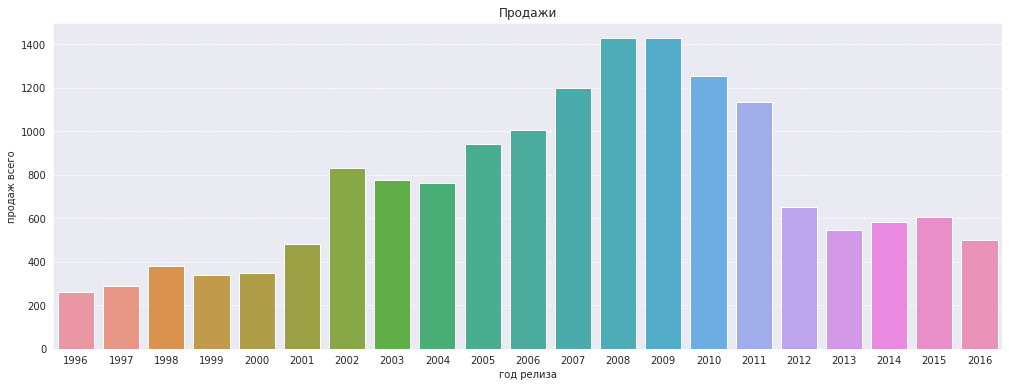

In [32]:
fig, ax = plt.subplots(figsize=(17,6))
sns.barplot(x='year_of_release', y='total_sales', data=actual_games_data,ax=ax, estimator=len)
ax.set_title('Продажи')
plt.xlabel('год релиза')
plt.ylabel('продаж всего')
print()

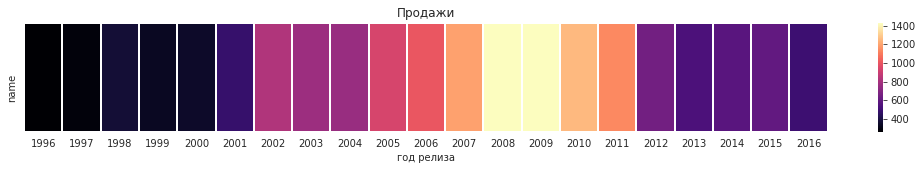

In [33]:
fig, ax = plt.subplots(figsize=(18,2))
sns.heatmap(actual_games_data.pivot_table(values='name', columns='year_of_release', aggfunc='count'), ax=ax, cmap='magma', linecolor='white', linewidths=1)
ax.set_title('Продажи')
plt.xlabel('год релиза')
print()

Посмотрим, как менялись продажи по платформам. 

In [34]:
(actual_games_data
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False).head(10))

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,685.59
PS4,314.14
GBA,312.88
PSP,289.53


In [35]:
sales_of_year = (actual_games_data
                 .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'))

In [36]:
sales_of_year['total_sales'] = sales_of_year.sum(axis=1)

In [37]:
pd.set_option('display.max_columns', 30)
top_ten_sales = sales_of_year.sort_values(by='total_sales', ascending=False).head(10) 
top_ten_sales

year_of_release,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_sales
platform,,,,,,,,,,,,,,,,,,,,,,
PS2,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.76
PS,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685.59
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
GBA,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.88
PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,289.53


In [38]:
actual_games_data[(actual_games_data['year_of_release'] == 2000) & (actual_games_data['platform'] == 'GBA')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11494,ESPN Winter X-Games: Snowboarding 2002,GBA,2000,Sports,0.05,0.02,0.0,0.0,NaN,NaN,no_rating,0.07


В сводной таблице я обнаружил подозрительное значение. Консоль GBA(Game Boy Advance) вышла в 2001 году, однако в таблице присутствуют продажи за 2000 год. Проверив данные, я убедился, что это игр 2002 года, и 2000 год стоит здесь по ошибке.

Исправим значение. 

In [39]:
actual_games_data.loc[(actual_games_data['year_of_release'] == 2000) & (actual_games_data['platform'] == 'GBA'), 'year_of_release'] = 2002
top_ten_sales.loc[top_ten_sales.index == 'GBA',2000] = np.nan

In [40]:
top_ten_sales.drop('total_sales', axis=1).swapaxes("index", "columns").notna().sum().mean()

9.3

В среднем, игровые платформы живут 9 лет.

Теперь построим график для этой таблицы.

In [41]:
sns.set(style="whitegrid")

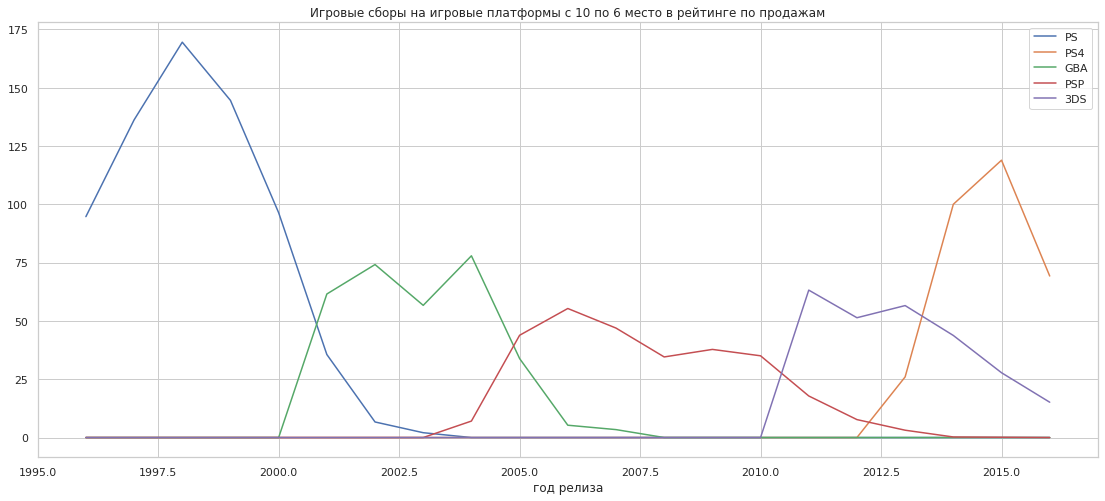

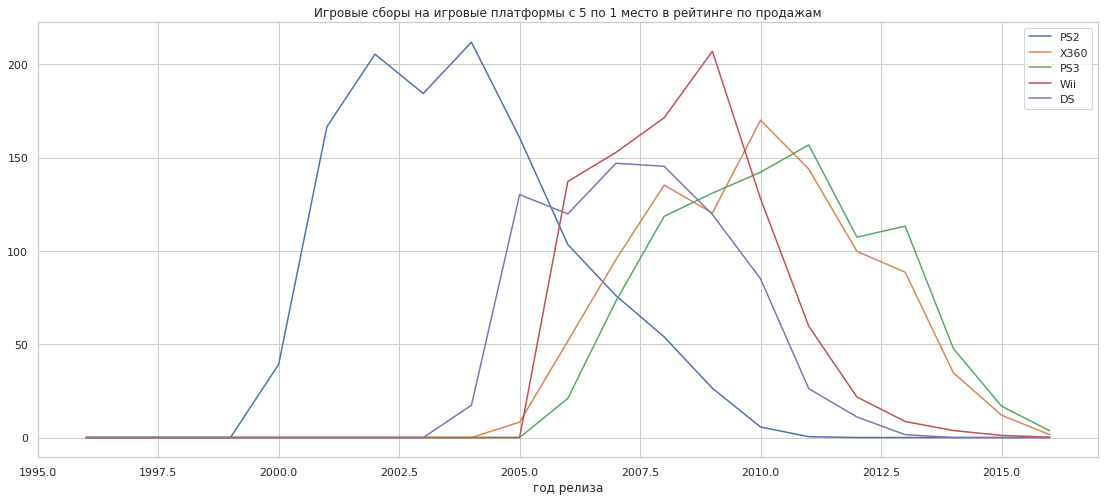

In [42]:
for i, j in zip(range(5, -1,-5),range(10, -1,-5)):
    fig, ax = plt.subplots(figsize=(19,8))
    sns.lineplot(data=top_ten_sales.drop('total_sales', axis=1)[i:j].swapaxes("index", "columns").fillna(0), dashes=False, ax=ax)
    plt.xlabel('год релиза')
    ax.set_title('Игровые сборы на игровые платформы c {} по {} место в рейтинге по продажам'.format(j,i+1))
    plt.show()

На графиках видно, 3DS на момент 2016 года еще актуальна, а PS4 только набирает обороты. Можно сделать выводы, что делать ставки нужно именно на них. Также, есть смысл изучить платформы, которые еще не набрали популярности, но все еще впереди.
Из лидеров по продажам также X360 и PS2 почти изжили себя. 

Глянем на продажи аутсайдеров.

In [43]:
sales_of_year.sort_values(by='total_sales').head(14)

year_of_release,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_sales
platform,,,,,,,,,,,,,,,,,,,,,,
PCFX,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03
NG,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10
WS,NaN,NaN,NaN,0.46,0.68,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.42
DC,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.95
SNES,15.92,0.99,0.22,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.39
SAT,7.69,6.77,3.82,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.37
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25,53.81
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60,82.19
GB,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.30


Платформы PCFX и NG "доживают" последние года и рассматривать их нет смысла. Подобная картина, но чуть лучше у SNES и SAT. У WS вообще мизерные продажи и для исследования он не подойдет.

Удалим их из таблицы.

In [44]:
other_platforms = sales_of_year.sort_values(by='total_sales').head(14)

In [45]:
for index in ['PCFX', 'NG', 'WS', 'SNES', 'SAT']:
    other_platforms = other_platforms[other_platforms.index != index]
other_platforms

year_of_release,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,total_sales
platform,,,,,,,,,,,,,,,,,,,,,,
DC,NaN,NaN,3.38,5.16,5.99,1.07,0.29,NaN,NaN,NaN,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.95
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25,53.81
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.56,21.65,22.03,16.35,4.60,82.19
GB,36.03,6.37,26.90,38.00,19.76,9.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.30
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.96,54.07,60.14,26.15,159.32
GC,NaN,NaN,NaN,NaN,NaN,26.34,51.81,50.61,28.82,27.62,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.73
N64,34.10,39.50,49.24,57.87,33.97,3.25,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.01
PC,10.58,11.27,3.26,4.74,4.66,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,235.57
XB,NaN,NaN,NaN,NaN,0.99,22.26,48.01,55.04,65.42,49.08,10.04,0.55,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,251.57


In [46]:
other_platforms.drop('total_sales', axis=1).swapaxes("index", "columns").notna().sum().mean()

8.0

Остальные консоли в среднем живут 8 лет.

Построим графики для всех остальных.

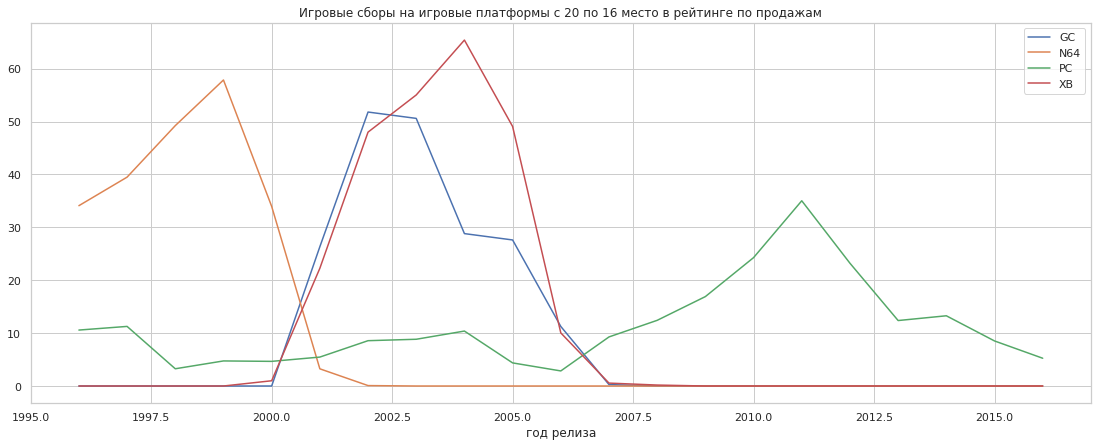

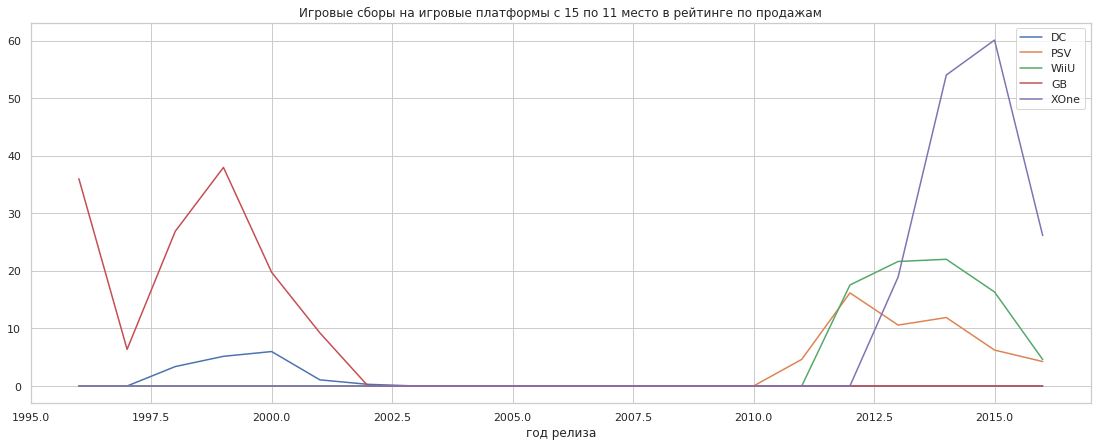

In [47]:
for i, j in zip(range(5, -1,-5),range(10, -1,-5)):
    fig, ax = plt.subplots(figsize=(19, 7))
    sns.lineplot(data=other_platforms.drop('total_sales', axis=1)[i:j].swapaxes("index", "columns").fillna(0), dashes=False, ax=ax)
    plt.xlabel('год релиза')
    ax.set_title('Игровые сборы на игровые платформы c {} по {} место в рейтинге по продажам'.format(10+j,10+i+1))
    plt.show()

игры на PC продаются на протежянии всего периода. Это вызванно тем, что концептуально эта платформа не имеет поколения, как, к примуру, PS (PS, PS2, PS3, PS4). XOne, WiiU, PSV и DS актуальны и продажи еще не закончились. XOne только начал набирать обороты.

Рассмотрим количество выпускаемых игр для каждой платфлормы каждый год.

In [48]:
(actual_games_data
 .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count'))

platform,3DS,DC,DS,GB,GBA,GC,N64,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,
1996,NaN,NaN,NaN,6.0,NaN,NaN,18.0,2.0,4.0,1.0,164.0,NaN,NaN,NaN,NaN,NaN,38.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,8.0,NaN,NaN,49.0,NaN,6.0,NaN,188.0,NaN,NaN,NaN,NaN,NaN,34.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,7.0,NaN,8.0,NaN,NaN,77.0,NaN,8.0,NaN,248.0,NaN,NaN,NaN,NaN,NaN,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,14.0,NaN,11.0,NaN,NaN,102.0,NaN,7.0,NaN,200.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
2000,NaN,20.0,NaN,17.0,NaN,NaN,60.0,NaN,7.0,NaN,160.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN
2001,NaN,8.0,NaN,10.0,107.0,22.0,9.0,NaN,15.0,NaN,91.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,33.0,NaN
2002,NaN,1.0,NaN,NaN,199.0,152.0,1.0,NaN,19.0,NaN,20.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,NaN
2003,NaN,NaN,NaN,NaN,150.0,144.0,NaN,NaN,33.0,NaN,3.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,NaN
2004,NaN,NaN,23.0,NaN,175.0,83.0,NaN,NaN,30.0,NaN,NaN,259.0,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.0,NaN


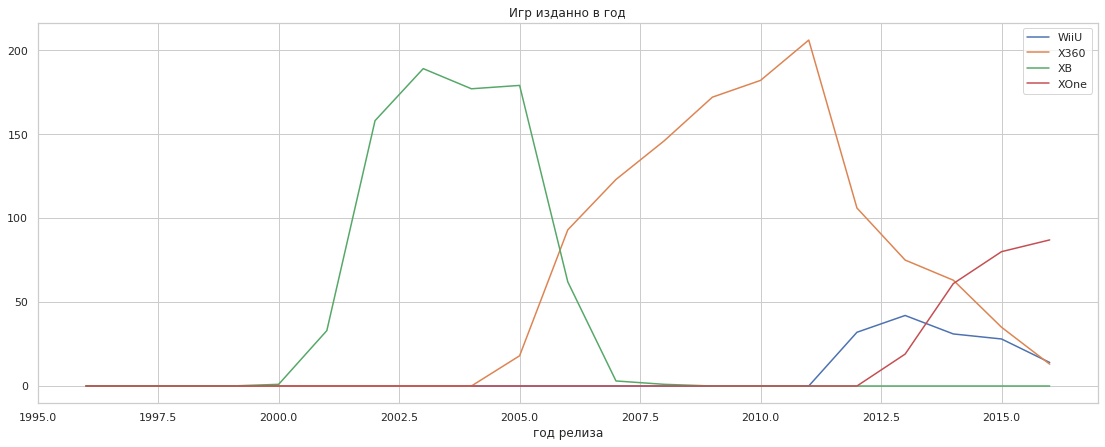

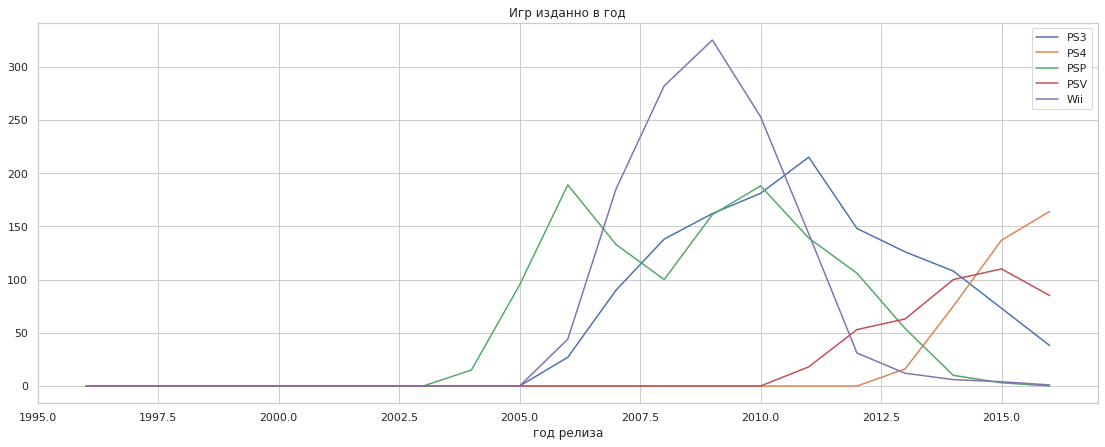

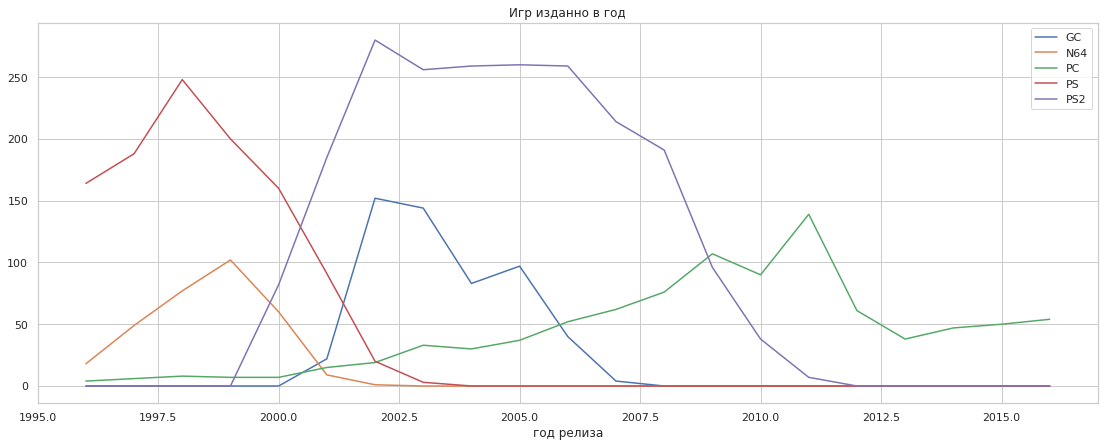

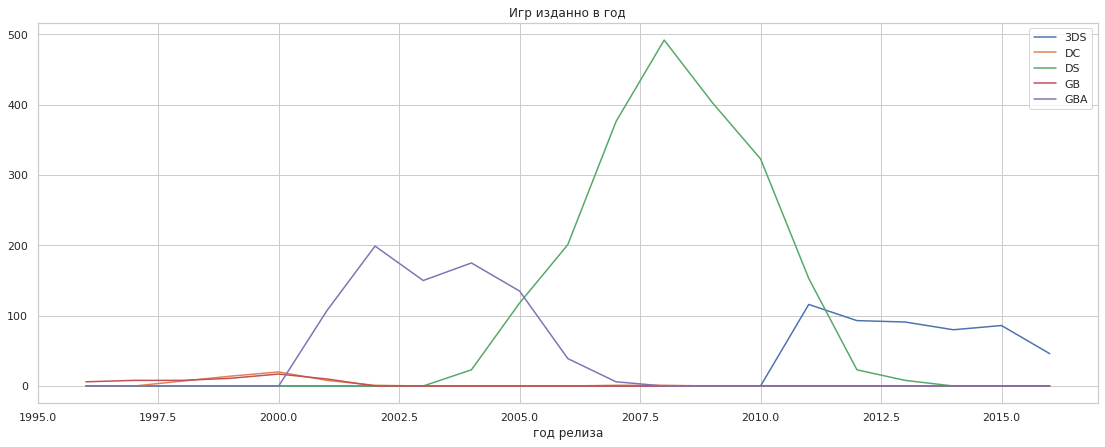

In [49]:
for i, j in zip(range(15, -1,-5),range(20, -1,-5)):
    fig, ax = plt.subplots(figsize=(19,7))
    sns.lineplot(data = (actual_games_data
                 .pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')
                 .fillna(0).drop(['PCFX', 'NG', 'WS', 'SNES', 'SAT'],axis=0)[i:j]
                 .swapaxes("index", "columns")), dashes=False, ax=ax)
    ax.set_title('Игр изданно в год')
    plt.xlabel('год релиза')
    plt.show()

Выберем наиболее перспективные платформы. Для этого посмотрим, для чего выпускаются игры за последнии 3 года, и выпуск которых еще не прекратился.

In [50]:
perspective_platform = actual_games_data[(actual_games_data['year_of_release'] >= 2014)].reset_index(drop=True) 
perspective_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98


Их количество.

In [51]:
(perspective_platform.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
 .drop(['PSP','Wii'], axis=1)
 .sum()
 .sort_values(ascending=False))

platform
PS4     376.0
PSV     295.0
XOne    228.0
PS3     219.0
3DS     212.0
PC      151.0
X360    111.0
WiiU     73.0
dtype: float64

И их сборы.

In [52]:
(perspective_platform
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .drop(['PSP','Wii'], axis=1)
 .sum()
 .sort_values(ascending=False))

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
dtype: float64

Мы получили список всех перспективных на 2016 год игровых платформ. Однако ранее мы выяснили, что продажи игр на X360 и PS3 падают по причинам их устаревания и замене их на новое поколение, которое вышло в 2012 году. Таким образом, прошло уже 4 года, как пришла замена и издатели игр всоре вообще прекратят их поддержку. WiiU и 3DS тоже на закате своего цикла, однако совсем забывать про них не стоит. У PSV огромное количество игр, но очень малые сборы. Это говорит о том, что хоть и издадтели поддерживают ее, но сами игроки в ней не заинтерисованны.

Таким образом можно выделить топ 3 перспективные платформы: 
 1. PS4
 2. XOne
 3. PC
 
PC является неустаревающей платформой и, хоть и сборы на нем не большие, как игровая платформа, PC будет актуальна.

Делать ставки на PSV, PS3, 3DS, X360 и WiiU слишком рискованно, так как разработка игр и продажи падают.

Можно выделить общий период <b>(1998-2016)</b>

In [53]:
actual_games_data = actual_games_data[(actual_games_data['year_of_release'] > 1997) ].reset_index(drop=True)
actual_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15187 entries, 0 to 15186
Data columns (total 12 columns):
name               15187 non-null object
platform           15187 non-null object
year_of_release    15187 non-null int32
genre              15187 non-null object
na_sales           15187 non-null float64
eu_sales           15187 non-null float64
jp_sales           15187 non-null float64
other_sales        15187 non-null float64
critic_score       7954 non-null float64
user_score         7433 non-null float64
rating             15187 non-null object
total_sales        15187 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.3+ MB


Для исследования таблицу можно разбить на два периода. 

Первый <b>(2010-2016)</b>, это период, где находятся все ныне " живые" игровые платформы. На них в дальнейшем и нужно будет делать ставку в продажах. 

In [54]:
new_platform = (actual_games_data[((actual_games_data['year_of_release'] >= 2010)
                                  & (actual_games_data['platform']
                                     .isin(['PS4','XOne','PSV', 'PS3', '3DS', 'X360', 'WiiU', 'PC'])))]
                .reset_index(drop=True))
new_platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3775 entries, 0 to 3774
Data columns (total 12 columns):
name               3775 non-null object
platform           3775 non-null object
year_of_release    3775 non-null int32
genre              3775 non-null object
na_sales           3775 non-null float64
eu_sales           3775 non-null float64
jp_sales           3775 non-null float64
other_sales        3775 non-null float64
critic_score       2053 non-null float64
user_score         2260 non-null float64
rating             3775 non-null object
total_sales        3775 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 339.3+ KB


Второй <b>(1998-2012)</b>, это период, где находятся исжившие себя платформы. По ним можно предсказать поведение свежих платформ.

In [55]:
old_platform = actual_games_data[(actual_games_data['year_of_release'] <= 2012) & (~actual_games_data['platform'].isin(['PS4','XOne','PSV', 'PS3', '3DS', 'X360', 'WiiU', 'PC']))].reset_index(drop=True)
old_platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9892 entries, 0 to 9891
Data columns (total 12 columns):
name               9892 non-null object
platform           9892 non-null object
year_of_release    9892 non-null int32
genre              9892 non-null object
na_sales           9892 non-null float64
eu_sales           9892 non-null float64
jp_sales           9892 non-null float64
other_sales        9892 non-null float64
critic_score       4767 non-null float64
user_score         4020 non-null float64
rating             9892 non-null object
total_sales        9892 non-null float64
dtypes: float64(7), int32(1), object(4)
memory usage: 888.9+ KB


In [56]:
actual_games_data['name'].value_counts()

Need for Speed: Most Wanted                                          12
FIFA 14                                                               9
LEGO Marvel Super Heroes                                              9
Ratatouille                                                           9
Madden NFL 07                                                         8
                                                                     ..
Eternal Darkness: Sanity's Requiem                                    1
Jelly Belly: Ballistic Beans                                          1
Hoshigami: Ruining Blue Earth                                         1
Pocket Dogs                                                           1
Monotaro Dentetsu 2010: Sengoku Ishin no Hero Daishuugou! no Maki     1
Name: name, Length: 10333, dtype: int64

В этой работе нам понадобится период <b>(2010-2016)</b>.

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. (зеленая стрелочка на графике - среднее)

Для актуальных платформ.

platform,X360,PS4,PS3,XOne,WiiU,3DS,PC,PSV
total_sales,0.809426,0.801378,0.661125,0.64502,0.559116,0.503535,0.254614,0.125431


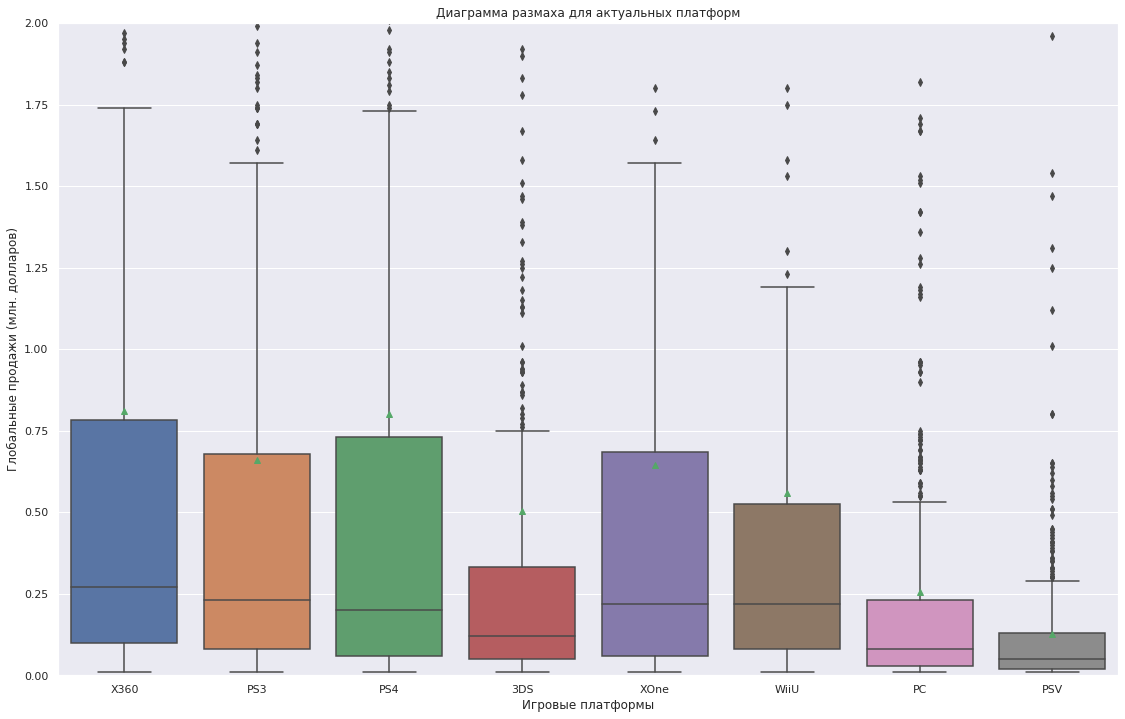

In [57]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(figsize=(19, 12))
    sns.boxplot(x='platform', y='total_sales', data=new_platform, ax=ax, showmeans=True)
    plt.ylim(0,2)
    plt.xlabel('Игровые платформы')
    plt.ylabel('Глобальные продажи (млн. долларов)')
    ax.set_title('Диаграмма размаха для актуальных платформ')
# таблица средних значений    
(new_platform
 .pivot_table(index='platform', values='total_sales', aggfunc='mean')
 .sort_values('total_sales', ascending=False)
 .swapaxes('index', 'columns'))

Как видно из первого графика, X360 является лидером, однако разница в продажах у WiiU, X360, XOne, PS3 и PS4 не велика. Но, если смотреть на среднее, то X360 и PS4  безусловные лидеры. А PC и PSV показывают низкие продажи в этом периоде.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Рассмотрим PS4.

-0.031957110204556424

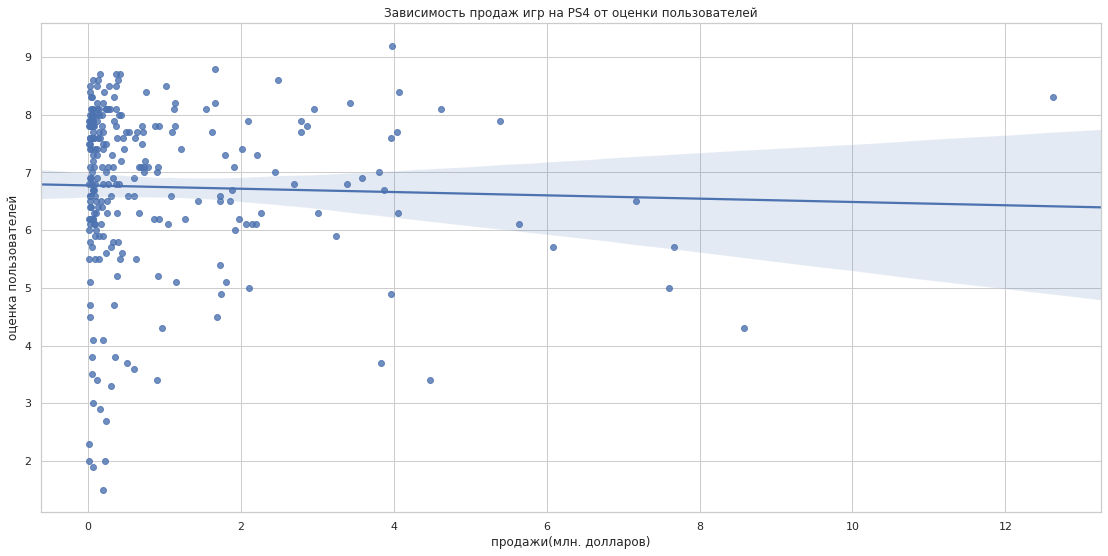

In [58]:
fig, ax = plt.subplots(figsize=(19,9))
sns.regplot(x='total_sales', y='user_score', data=new_platform[new_platform['platform']=='PS4'], ax=ax)
plt.xlabel('продажи(млн. долларов)')
plt.ylabel('оценка пользователей')
ax.set_title('Зависимость продаж игр на PS4 от оценки пользователей')
new_platform[new_platform['platform']=='PS4']['total_sales'].corr(new_platform[new_platform['platform']=='PS4']['user_score'])

0.406567902061781

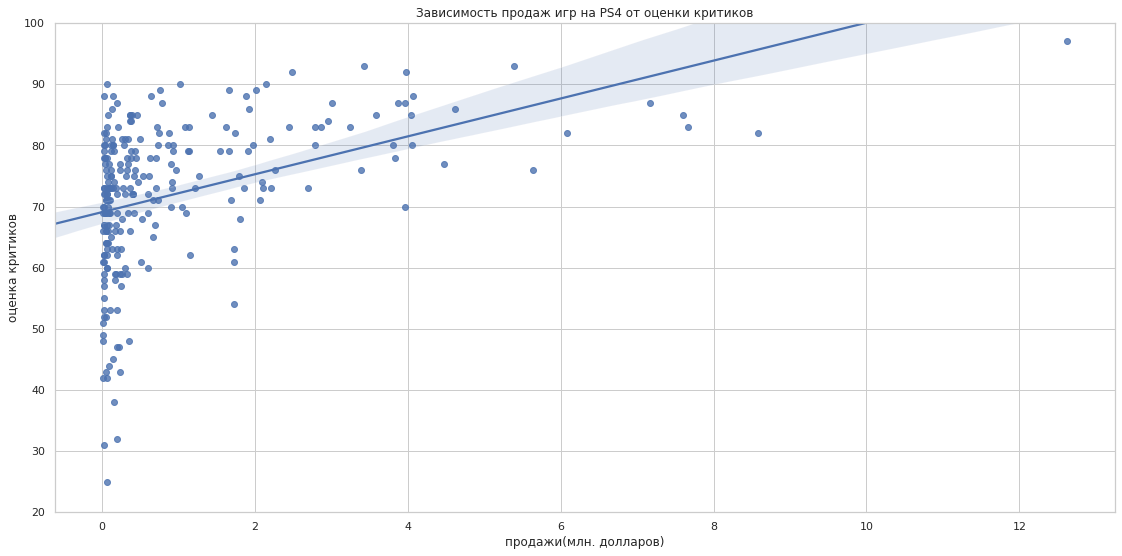

In [59]:
fig, ax = plt.subplots(figsize=(19,9))
sns.regplot(x='total_sales', y='critic_score', data=new_platform[new_platform['platform']=='PS4'], ax=ax)
plt.xlabel('продажи(млн. долларов)')
plt.ylabel('оценка критиков')
plt.ylim(20,100)
ax.set_title('Зависимость продаж игр на PS4 от оценки критиков')
new_platform[new_platform['platform']=='PS4']['total_sales'].corr(new_platform[new_platform['platform']=='PS4']['critic_score'])

Здесь мы видим, что продажи игр на PS3 зависят от оценок критиков и практически не зависят от пользовательских оценок. 

Сравним это с другими платформами.

In [60]:
new_platform['platform'].value_counts().index

Index(['PS3', 'X360', '3DS', 'PC', 'PSV', 'PS4', 'XOne', 'WiiU'], dtype='object')

Зависимость продаж от оценок критиков для PS3: 0.401
Зависимость продаж от оценок критиков для X360: 0.34
Зависимость продаж от оценок критиков для 3DS: 0.349
Зависимость продаж от оценок критиков для PC: 0.336
Зависимость продаж от оценок критиков для PSV: 0.132
Зависимость продаж от оценок критиков для PS4: 0.407
Зависимость продаж от оценок критиков для XOne: 0.417
Зависимость продаж от оценок критиков для WiiU: 0.348


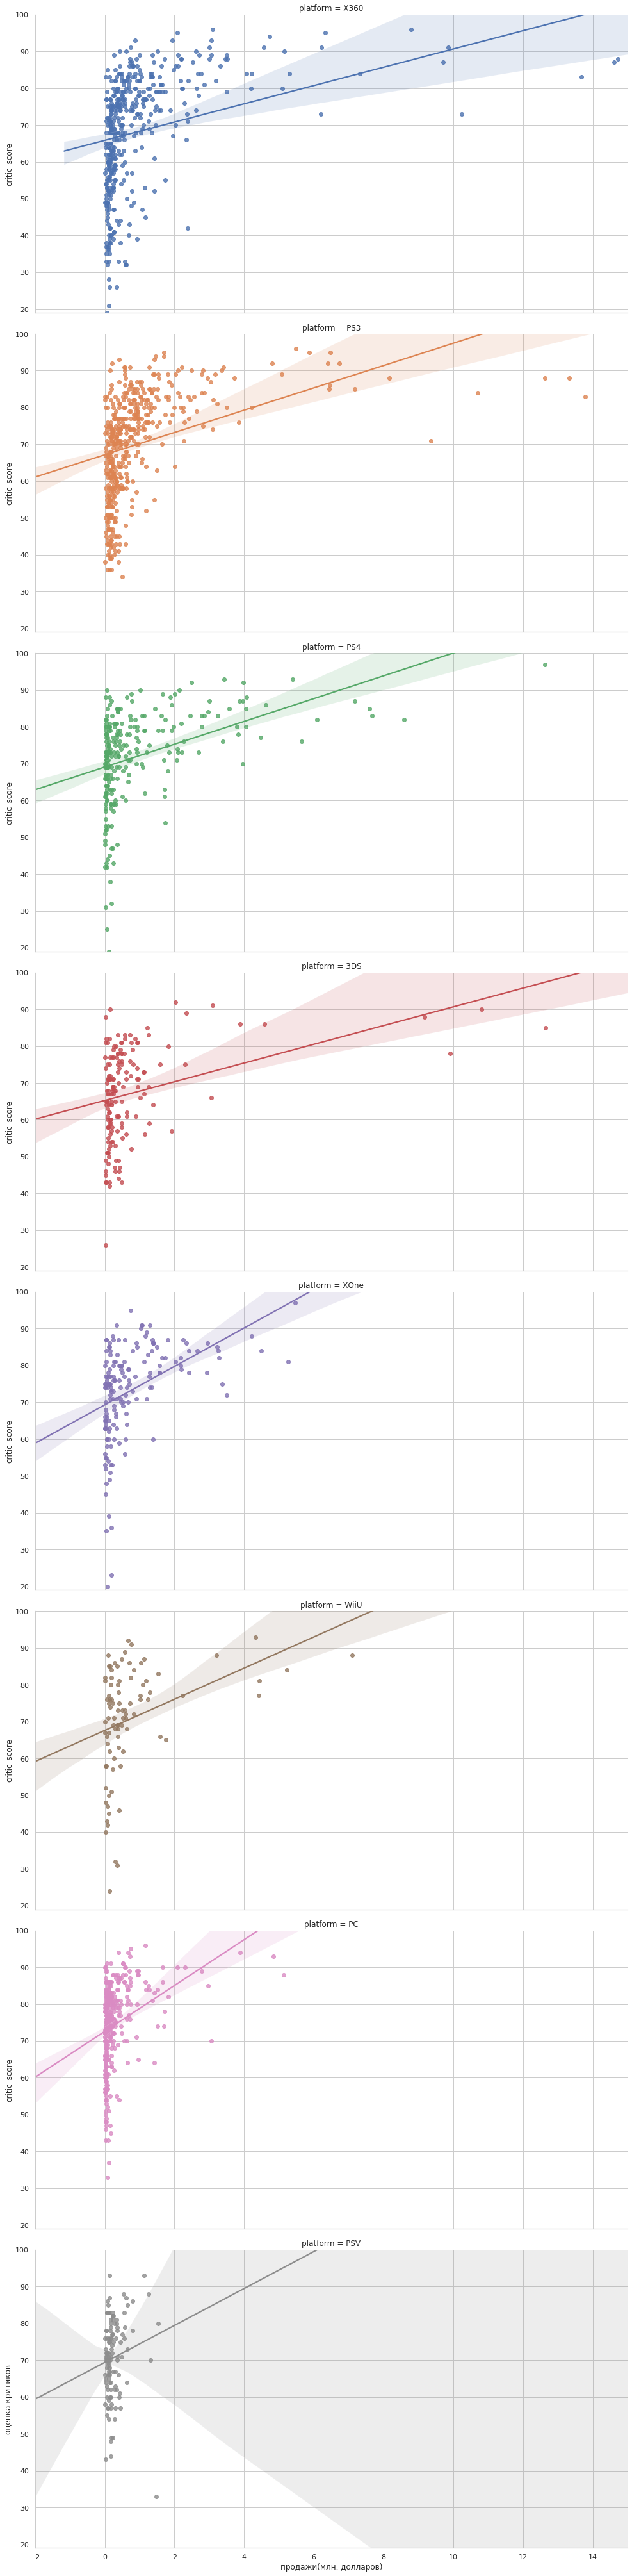

In [61]:
sns.lmplot(x='total_sales', y='critic_score', row='platform', data=new_platform, hue='platform', height=7, aspect=2)

plt.xlabel('продажи(млн. долларов)')
plt.ylabel('оценка критиков')
plt.ylim(19,100)
plt.xlim(-2,15)

for platform in new_platform['platform'].value_counts().index:
    print('Зависимость продаж от оценок критиков для {}: {}'
          .format(platform, (new_platform[new_platform['platform']==platform]['total_sales']
                             .corr(new_platform[new_platform['platform']==platform]['critic_score'])
                             .round(3))))

Зависимость продаж от оценок пользователей для PS3: 0.065
Зависимость продаж от оценок пользователей для X360: 0.066
Зависимость продаж от оценок пользователей для 3DS: 0.222
Зависимость продаж от оценок пользователей для PC: -0.011
Зависимость продаж от оценок пользователей для PSV: 0.013
Зависимость продаж от оценок пользователей для PS4: -0.032
Зависимость продаж от оценок пользователей для XOne: -0.069
Зависимость продаж от оценок пользователей для WiiU: 0.4


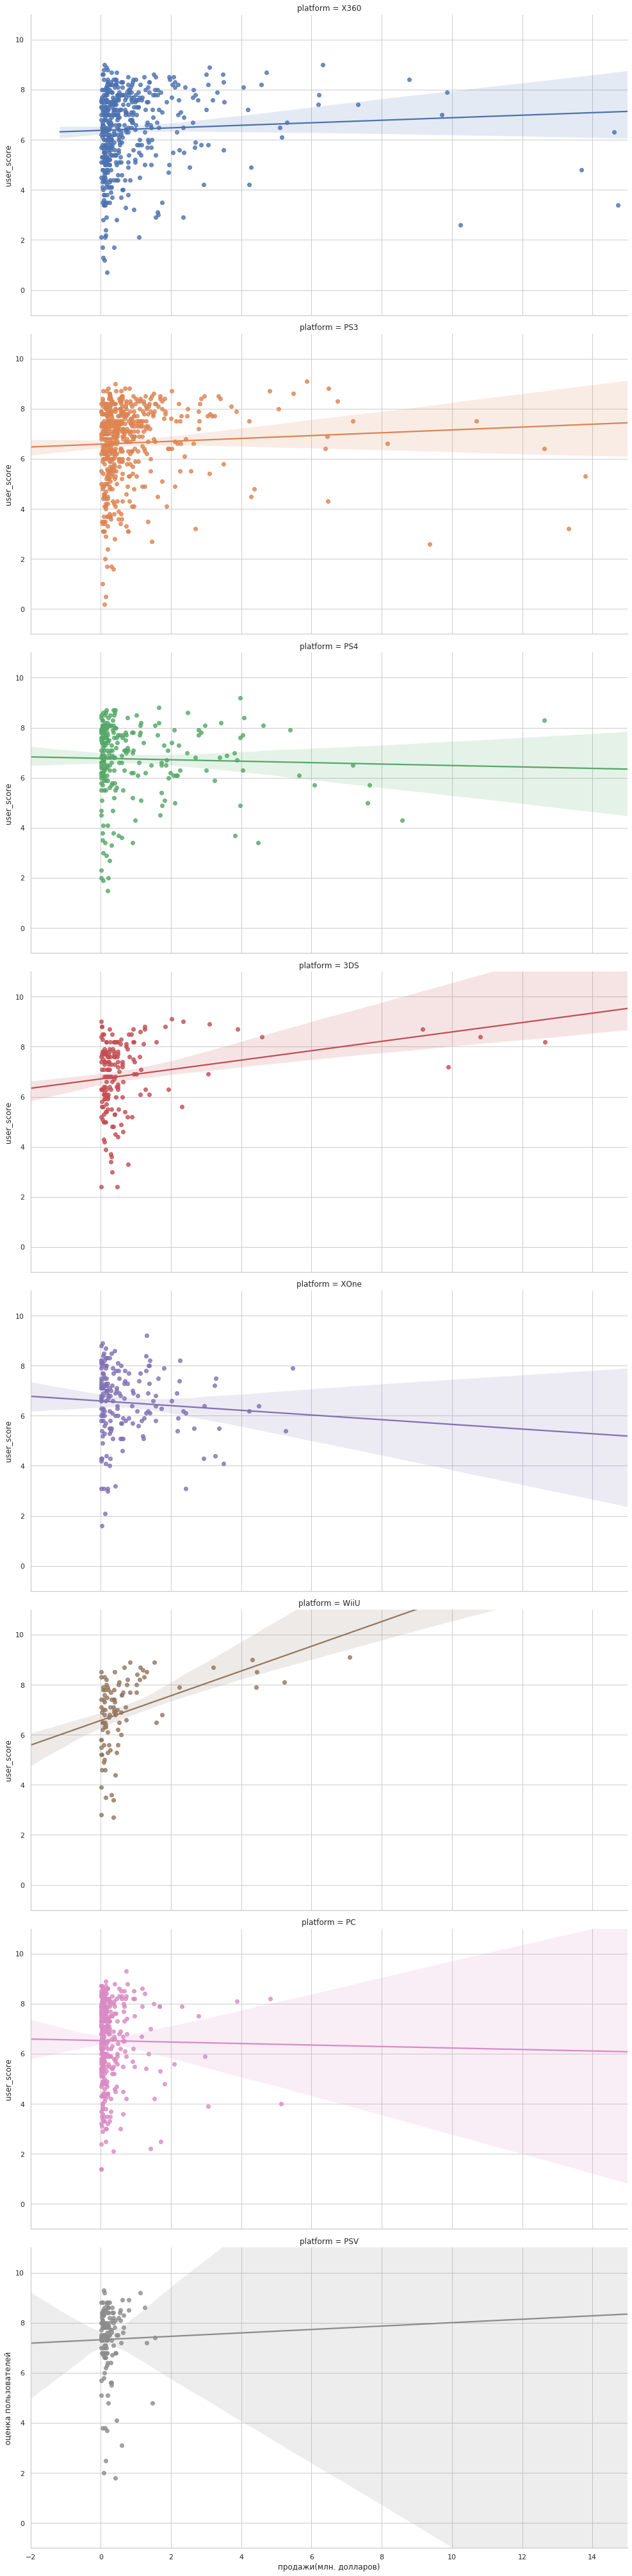

In [62]:
sns.lmplot(x='total_sales', y='user_score', row='platform', data=new_platform, hue='platform', height=7, aspect=2)

plt.xlabel('продажи(млн. долларов)')
plt.ylabel('оценка пользователей')
plt.ylim(-1,11)
plt.xlim(-2,15)

for platform in new_platform['platform'].value_counts().index:
    print('Зависимость продаж от оценок пользователей для {}: {}'
          .format(platform, (new_platform[new_platform['platform']==platform]['total_sales']
                             .corr(new_platform[new_platform['platform']==platform]['user_score'])
                             .round(3))))

Для большинства платформ, большее влияние оказывают оценки критиков. Оценки пользователей же почти не влияют (не считая WiiU и 3DS).

Посмотрим на общее распределение игр по жанрам.

In [63]:
new_platform.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          590.84
Shooter         473.02
Sports          275.95
Role-Playing    255.05
Misc            125.29
Racing          113.28
Platform         83.27
Fighting         74.54
Simulation       58.16
Adventure        43.56
Strategy         26.64
Puzzle            7.78
Name: total_sales, dtype: float64

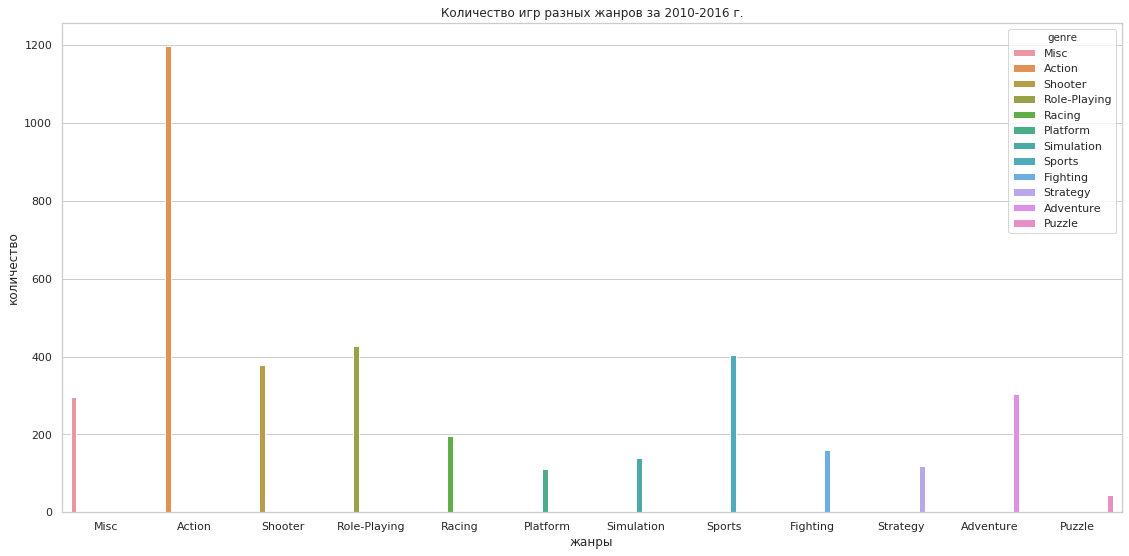

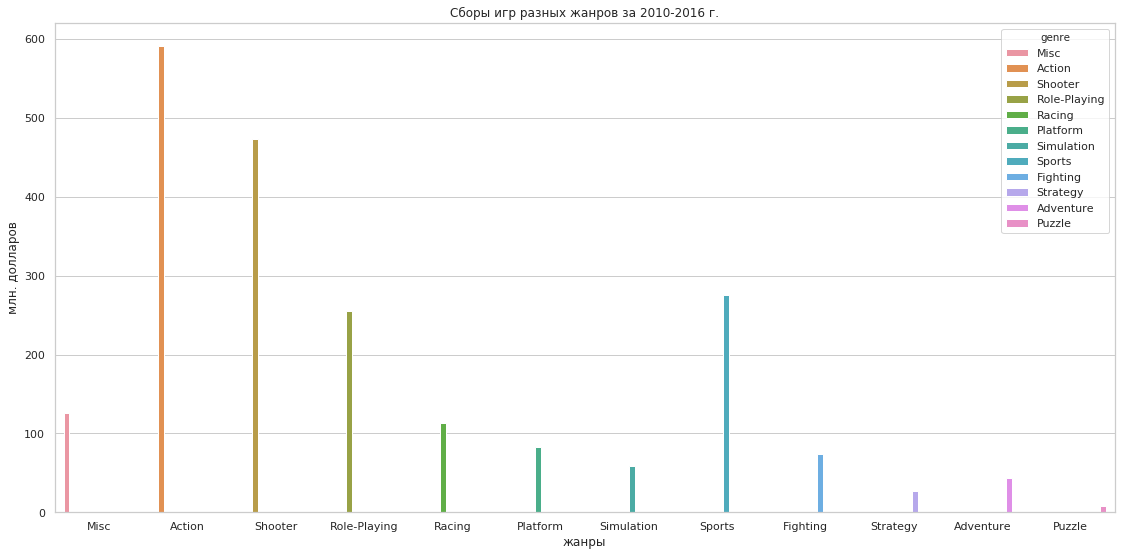

In [97]:
for estimator, word, y_label in zip((len,sum),('Количество', 'Сборы'),('количество', 'млн. долларов')):
    fig, ax = plt.subplots(figsize=(19,9))
    sns.barplot(y='total_sales', x='genre', data=new_platform, hue='genre', estimator=estimator, ax=ax, ci=None)
    plt.xlabel('жанры')
    plt.ylabel(y_label)
    ax.set_title('{} игр разных жанров за 2010-2016 г.'.format(word))

Игры жанра Action лидируют как по сборам, так и по количеству игр. Однако, не смотря на то, что шутеров гораздо меньше, сборы по ним просто колссальные. Тогда, как отношение сборов игр жанра Action к их сборам равно 1:2, это же отношение у Shooter равно 1.2:1. Игры же жанра Pazzle, Strategy и Adventure являются аутсайдерами.

### Вывод

Был найден топ-3 платформы:
 1. PS4
 2. XOne
 3. PC
Продажи же по остальным платформам будут активно падать.

Был выделен наиболее актуальный период для исследования - <b>(2010-2016)</b>.

Оценка критиков значительно влияет на продажи, тогда, как оценка пользователей практически не влияет.
Самый попупулярный жанр Action, самый прибыльный, в расчете на одну игру, - Shooter. Игры жанра Pazzle, Strategy и Adventure имеют самую низкую популярность.

## Шаг 4. Составьте портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

   - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
   - Самые популярные жанры (топ-5). Поясните разницу.
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Самые популярные платформы (топ-5).

In [65]:
new_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
3,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
4,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
...,...,...,...,...,...,...,...,...,...,...,...,...
3770,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
3771,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
3772,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
3773,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


In [114]:
top_platform_reg = (new_platform
                    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
                    .sum().sort_values('na_sales', ascending=False)
                    .swapaxes('index','columns'))

In [115]:
top_platform_reg

platform,X360,PS3,PS4,XOne,3DS,PC,WiiU,PSV
na_sales,334.18,229.25,108.74,93.12,82.65,39.07,38.10,12.47
eu_sales,163.41,213.60,141.09,51.59,61.27,68.82,25.13,13.07
jp_sales,5.46,59.26,15.96,0.34,100.62,0.00,13.01,21.84
other_sales,47.36,85.63,48.35,14.27,13.27,14.07,5.95,6.43


Text(0.5, 1.0, 'Влияние игровой платформы на продажи в регионах')

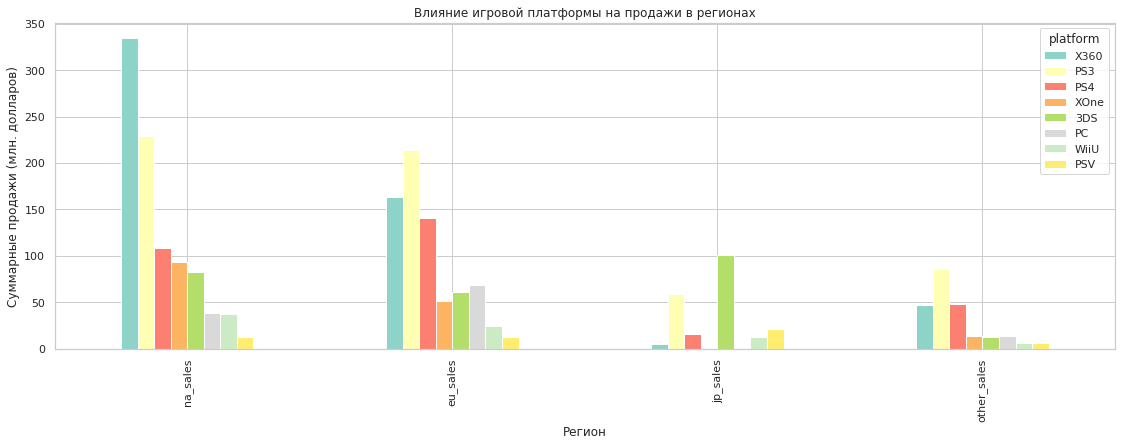

In [172]:
fig,ax = plt.subplots(figsize=(19,6))
top_platform_reg.plot.bar(ax=ax, cmap=plt.cm.Set3)
plt.xlabel('Регион')
plt.ylabel('Суммарные продажи (млн. долларов)')
ax.set_title('Влияние игровой платформы на продажи в регионах')

In [132]:
top_five_platform = pd.DataFrame({'Северная Америка':['X360', 'PS3', 'PS4', 'XOne', '3DS'],
                         'Европа':['PS3', 'X360', 'PS4', 'PC', '3DS'],
                         'Япония':['3DS', 'PS3', 'PSV', 'PS4', 'WiiU'], 
                         'Остальной мир':['PS3', 'PS4', 'X360', 'PC', 'XOne']}, index =range(1,6))

Топ 5 платформ в каждом регионе выглядит так:

In [133]:
top_five_platform

,Северная Америка,Европа,Япония,Остальной мир
1,X360,PS3,3DS,PS3
2,PS3,X360,PS3,PS4
3,PS4,PS4,PSV,X360
4,XOne,PC,PS4,PC
5,3DS,3DS,WiiU,XOne


Топы Европы и Северной Америки  Очень похожи. Присутствуют те же платформы, с небольшим отличием - PS3 и X360 имеют разное значение для жителей разных континентов, а PC игры Европейцы больше уважают. 

На Японсом рынке картина же совсем иная. Островитянам важна мобильность и местное производство. Поэтому на первом месте у них 3DS от японской компании Nintendo, и даже присутсвует на 3 месте такая неудачная PSV. Американские приставки Xbox, а также PC вообще не пользуются популярность.

Суммарно продажи Европы, а, тем более, Америки значительно выше Японских. 

Данные же по остальному миру копируют в процентном соотношении Европу.

#### Самые популярные жанры (топ-5).

In [119]:
top_genre_reg = (new_platform
                    .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
                    .sum().sort_values('na_sales', ascending=False)
                    .swapaxes('index','columns'))

In [120]:
top_genre_reg

genre,Action,Shooter,Sports,Role-Playing,Misc,Racing,Fighting,Platform,Simulation,Adventure,Strategy,Puzzle
na_sales,250.92,233.02,130.09,97.12,67.60,40.69,36.65,36.00,17.81,15.79,9.84,2.05
eu_sales,210.90,170.02,102.01,68.49,33.73,51.75,19.10,28.41,24.01,15.12,11.36,3.08
jp_sales,59.70,13.85,10.01,67.60,12.37,6.62,11.13,10.94,11.66,7.90,2.60,2.11
other_sales,69.32,56.13,33.84,21.84,11.59,14.22,7.66,7.92,4.68,4.75,2.84,0.54


Text(0.5, 1.0, 'Влияние жанра на продажи в регионах')

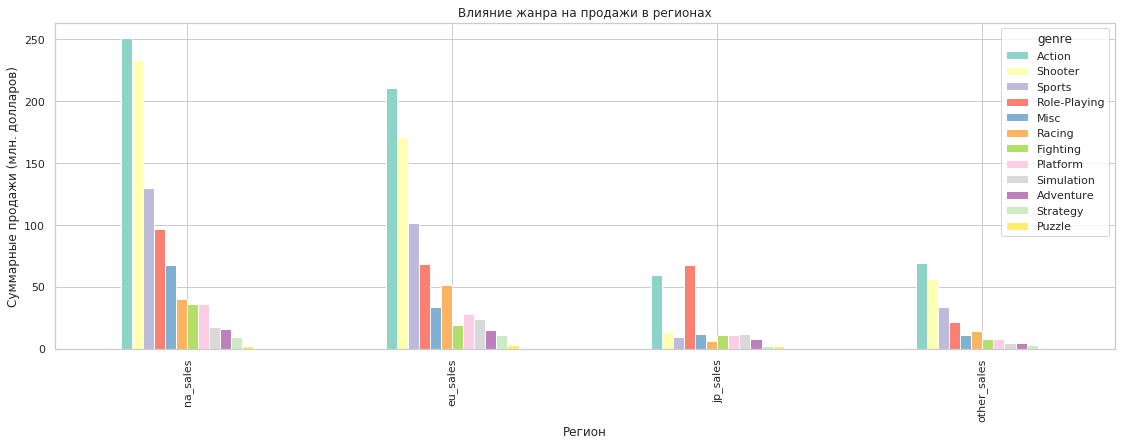

In [171]:
fig,ax = plt.subplots(figsize=(19,6))
top_genre_reg.plot.bar(ax=ax, cmap=plt.cm.Set3)
plt.xlabel('Регион')
plt.ylabel('Суммарные продажи (млн. долларов)')
ax.set_title('Влияние жанра на продажи в регионах')

In [130]:
top_five_genre = pd.DataFrame({'Северная Америка':['Action', 'Shooter', 'Sports', 'Role-Plaing', 'Misc'],
                         'Европа':['Action', 'Shooter', 'Sports', 'Role-Plaing', 'Racing'],
                         'Япония':['Role-Plaing', 'Action', 'Shooter', 'Misc', 'Simulation'],
                         'Остальной мир':['Action', 'Shooter', 'Sports', 'Role-Plaing', 'Racing']}, index =range(1,6))

In [131]:
top_five_genre

,Северная Америка,Европа,Япония,Остальной мир
1,Action,Action,Role-Plaing,Action
2,Shooter,Shooter,Action,Shooter
3,Sports,Sports,Shooter,Sports
4,Role-Plaing,Role-Plaing,Misc,Role-Plaing
5,Misc,Racing,Simulation,Racing


В Америке и Европе преобладают одни и те же жанры. Любители бургеров, буррито, спагетти и баварских колбасок одинаково любят динамичные игры, пострелять во вражину и занятся спортом не вставая с дивана.

В то время, когда гайдзины тащатся от шутеров, самураям подавай РПГ. Жители страны восходящего солнца также не прочь погонять в  Action, тогда, как остальные жанры у них не в почете.

И опять данные по остальному миру копируют Европу.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [175]:
top_rating_reg = (new_platform
                    .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
                    .sum().sort_values('na_sales', ascending=False).swapaxes('index', 'columns'))
top_rating_reg

rating,M,E,T,no_rating,E10+,EC,RP
na_sales,379.20,196.94,139.82,121.45,100.08,0.09,0.00
eu_sales,290.17,160.25,104.20,116.06,67.27,0.00,0.03
jp_sales,29.75,35.45,35.30,106.88,9.11,0.00,0.00
other_sales,95.99,48.14,35.23,34.35,21.61,0.00,0.01


Text(0.5, 1.0, 'Влияние рейтига ESRB на продажи ')

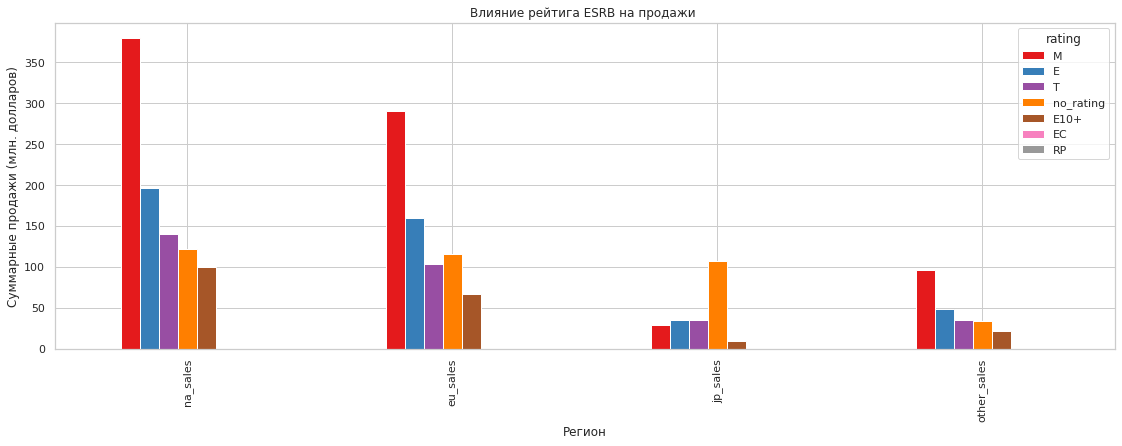

In [178]:
fig,ax = plt.subplots(figsize=(19,6))
top_rating_reg.plot.bar(ax=ax, cmap=plt.cm.Set1)
plt.xlabel('Регион')
plt.ylabel('Суммарные продажи (млн. долларов)')
ax.set_title('Влияние рейтига ESRB на продажи ')

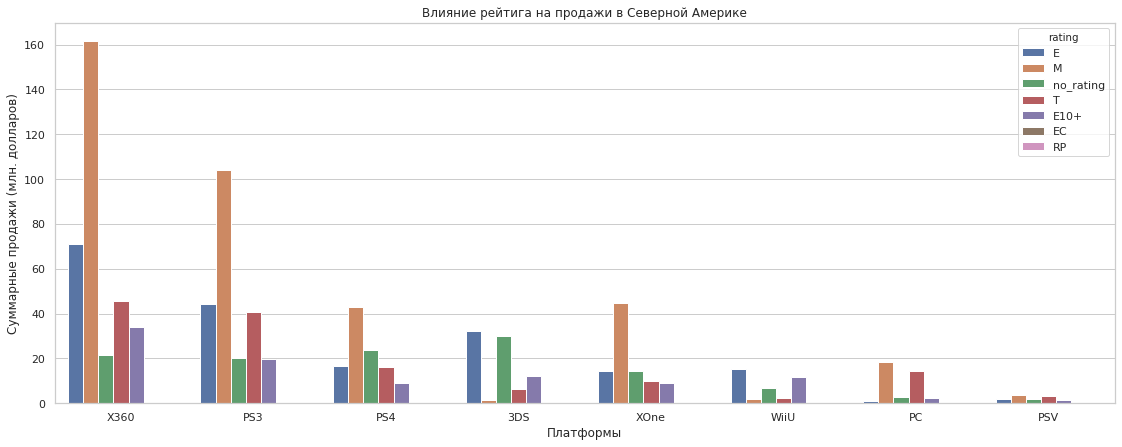

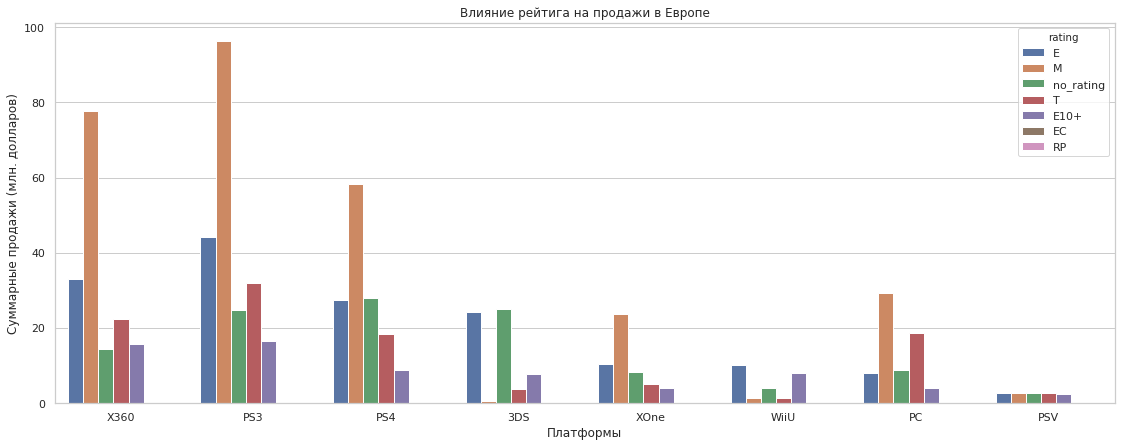

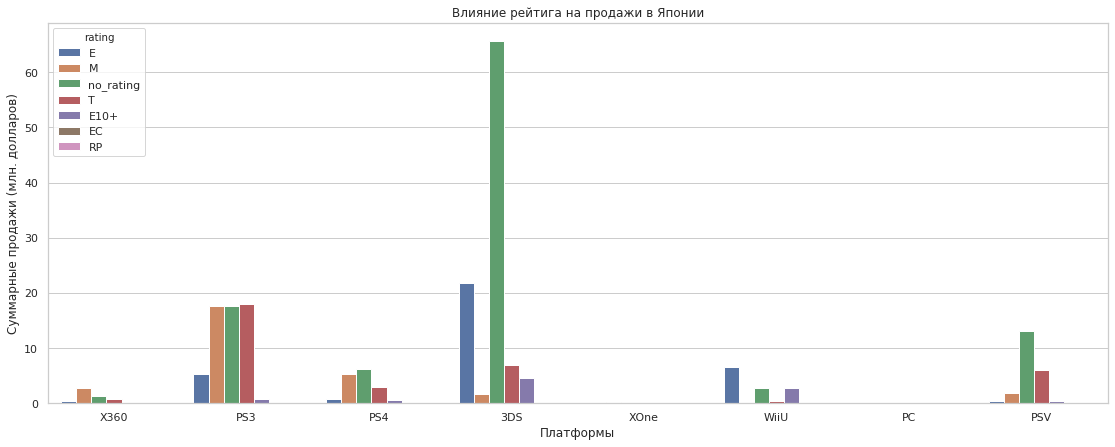

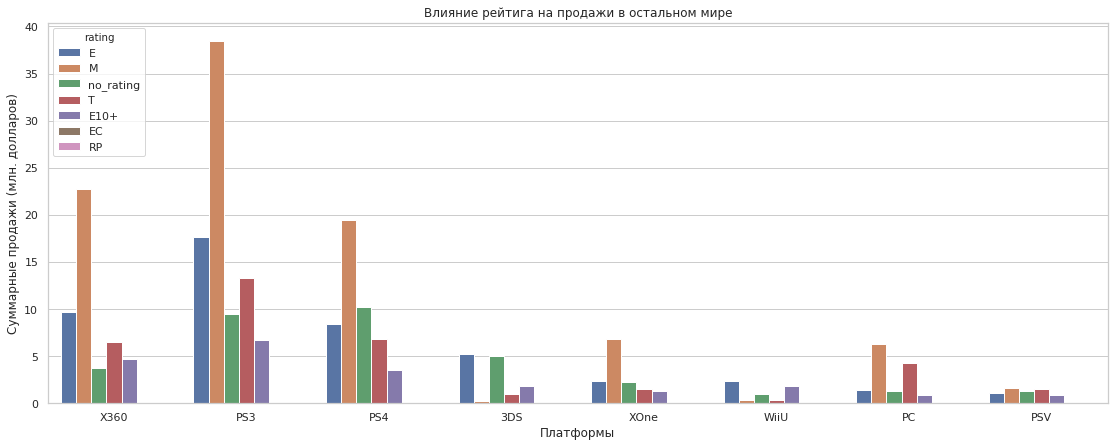

In [180]:
for country, c_sales in zip(('Северной Америке', 'Европе', 'Японии', 'остальном мире'),('na_sales','eu_sales','jp_sales', 'other_sales')):
    fig, ax = plt.subplots(figsize=(19,7))
    sns.barplot(data=new_platform, x= 'platform', y =c_sales, ax=ax, hue='rating', ci=None, estimator=sum)
    plt.xlabel('Платформы')
    plt.ylabel('Суммарные продажи (млн. долларов)')
    ax.set_title('Влияние рейтига на продажи в {}'.format(country)) 

В Америке, Европе и в остальном мире популярным является рейтинг M. «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. На втором месте «E» («Everyone» — «Для всех»), а на третьем - «E10+» («Everyone 10 and older» — «Для всех от 10 лет и старше»). В целом картина у этих регионов похожая.

Однако и здесь японский рынок выделился. Видимо рейтинг ESRB там не в почете, и японцы играют во что-то свое, чаще всего, не выходящее или не набирающее популярность в остальном мире.

## Вывод

Япония является отдельным самобытным рынком. У них свои платформы, свои хиты и свои жанры. Если в Америке, Европе и прочих странах можно применять практически одинаковую маркетинговую компанию, то к стране восходящего солнца нужен иной подход. 

## Шаг 5. Проверьте гипотезы

In [201]:
alpha = .05

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 
<div style="border:solid black 1px; padding: 20px">

- <b>H0</b>: Средние пользовательские рейтинги платформ Xbox One и PC равны.

</div>

In [236]:
xone_user_score = new_platform[new_platform['platform'] == 'XOne']['user_score'].dropna()
pc_user_score = new_platform[new_platform['platform'] == 'PC']['user_score'].dropna()

In [237]:
ttest_result_first_hipothesis = st.ttest_ind(xone_user_score, pc_user_score)

if ttest_result_first_hipothesis.pvalue > alpha:
    print('pvalue = ', ttest_result_first_hipothesis.pvalue,'\nГипотеза H0 не опровергнута')
else:
    print('pvalue = ', ttest_result_first_hipothesis.pvalue,'\nГипотеза H0 опровергнута')

pvalue =  0.980998110649032 
Гипотеза H0 не опровергнута


Таким образом мы не можем обровегнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

<div style="border:solid black 1px; padding: 20px">

- <b>H0</b>: Средние пользовательские рейтинги жанров Action и Sports равны.
- <b>H1</b>: Средние пользовательские рейтинги жанров Action и Sports разные.

</div>

In [238]:
action_user_score = new_platform[new_platform['genre'] == 'Action']['user_score'].dropna()
sports_user_score = new_platform[new_platform['genre'] == 'Sports']['user_score'].dropna()

In [239]:
ttest_result_second_hipothesis = st.ttest_ind(action_user_score, sports_user_score)

if ttest_result_second_hipothesis.pvalue > alpha:
    print('pvalue = ', ttest_result_second_hipothesis.pvalue,'\nГипотеза H0 не опровергнута')
else:
    print('pvalue = ', ttest_result_second_hipothesis.pvalue,'\nГипотеза H0 опровергнута')

pvalue =  2.9395138789416397e-21 
Гипотеза H0 опровергнута


Таким образом мы можем опровегнуть гипотезу о том, cредние пользовательские рейтинги жанров Action и Sports равны, a следовательно не можем опровергнуть: "<b>H1</b>: Средние пользовательские рейтинги жанров Action и Sports разные".

### Вывод

Проверив гипотезы, можно смело сказать, что вероятность того, что средние рейтинги Xbox One и PC одинаковые, очень высока. Тогда как пользовательские рейтинги Action и Sports с большой вероятностью разные.

## Шаг 6. Напишите общий вывод

В работе мы выделил <b>основной временной диапазон для анализа (2010-2016)</b>. Именно здесь находятся актуальные и самые новые платформы. 

Боло выясненно, что <b>средняя продолжительность жизни платформы 8 лет</b>. 

Узнали, что <b>рейтинг критиков имеет большое влияние на продажи в отличии от пользовательского рейтинга</b>. Хотя WiiU и 3DS являются исключением. 

Игры жанра Action лидируют как по сборам, так и по количеству игр. Однако, не смотря на то, что шутеров гораздо меньше, сборы по ним просто колссальные. Тогда, как отношение сборов игр жанра Action к их сборам равно 1:2, это же отношение у Shooter равно 1.2:1. Игры же жанра Pazzle, Strategy и Adventure являются аутсайдерами.

Топы Европы и Северной Америки Очень похожи. Присутствуют те же платформы, с небольшим отличием - PS3 и X360 имеют разное значение для жителей разных континентов, а PC игры Европейцы больше уважают.

На Японсом рынке картина же совсем иная. Островитянам важна мобильность и местное производство. Поэтому на первом месте у них 3DS от японской компании Nintendo, и даже присутсвует на 3 месте такая неудачная PSV. Американские приставки Xbox, а также PC вообще не пользуются популярность.

Суммарно продажи Европы, а, тем более, Америки значительно выше Японских.

Данные же по остальному миру копируют в процентном соотношении Европу.

In [240]:
top_five_platform

,Северная Америка,Европа,Япония,Остальной мир
1,X360,PS3,3DS,PS3
2,PS3,X360,PS3,PS4
3,PS4,PS4,PSV,X360
4,XOne,PC,PS4,PC
5,3DS,3DS,WiiU,XOne


В Америке и Европе преобладают одни и те же жанры. Любители бургеров, буррито, спагетти и баварских колбасок одинаково любят динамичные игры, пострелять во вражину и занятся спортом не вставая с дивана.

В то время, когда гайдзины тащатся от шутеров, самураям подавай РПГ. Жители страны восходящего солнца также не прочь погонять в Action, тогда, как остальные жанры у них не в почете.

И опять данные по остальному миру копируют Европу.

In [241]:
top_five_genre

,Северная Америка,Европа,Япония,Остальной мир
1,Action,Action,Role-Plaing,Action
2,Shooter,Shooter,Action,Shooter
3,Sports,Sports,Shooter,Sports
4,Role-Plaing,Role-Plaing,Misc,Role-Plaing
5,Misc,Racing,Simulation,Racing


В Америке, Европе и в остальном мире популярным является рейтинг M. «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. На втором месте «E» («Everyone» — «Для всех»), а на третьем - «E10+» («Everyone 10 and older» — «Для всех от 10 лет и старше»). В целом картина у этих регионов похожая.

Однако и здесь японский рынок выделился. Видимо рейтинг ESRB там не в почете, и японцы играют во что-то свое, чаще всего, не выходящее или не набирающее популярность в остальном мире.

Проверив гипотезы, можно смело сказать, что вероятность того, что средние рейтинги Xbox One и PC одинаковые, очень высока. Тогда как пользовательские рейтинги Action и Sports с большой вероятностью разные.